In [44]:
import pandas as pd

social_network_ads = pd.read_csv('Social_Network_Ads.csv')
social_network_ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [45]:
social_network_ads = social_network_ads[["Gender", "Age", "EstimatedSalary", "Purchased"]]

In [46]:
social_network_ads.corr()["Purchased"]

C:\Users\Nôam\AppData\Local\Temp\ipykernel_18384\3545186394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  social_network_ads.corr()["Purchased"]


Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

In [47]:
#We have categorical data that we need to replace.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit_transform(social_network_ads["Gender"])
social_network_ads.drop("Gender", axis=1, inplace=True)
social_network_ads["Gender"] = label_encoder
social_network_ads



C:\Users\Nôam\AppData\Local\Temp\ipykernel_18384\3923997338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_network_ads.drop("Gender", axis=1, inplace=True)
C:\Users\Nôam\AppData\Local\Temp\ipykernel_18384\3923997338.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_network_ads["Gender"] = label_encoder


,Age,EstimatedSalary,Purchased,Gender
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [48]:
social_network_ads.corr()["Purchased"] 

Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Gender            -0.042469
Name: Purchased, dtype: float64

In [49]:
#Okay so only the age and estimated salary are useful
social_network_ads[["Age", "EstimatedSalary", "Purchased"]] 


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<AxesSubplot: ylabel='Frequency'>

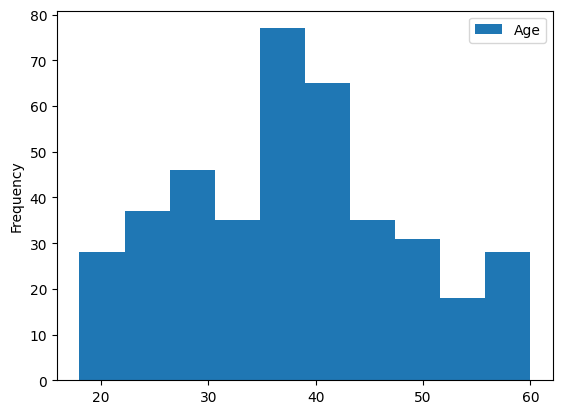

In [50]:
import seaborn as sns

social_network_ads.plot.hist(y = "Age")

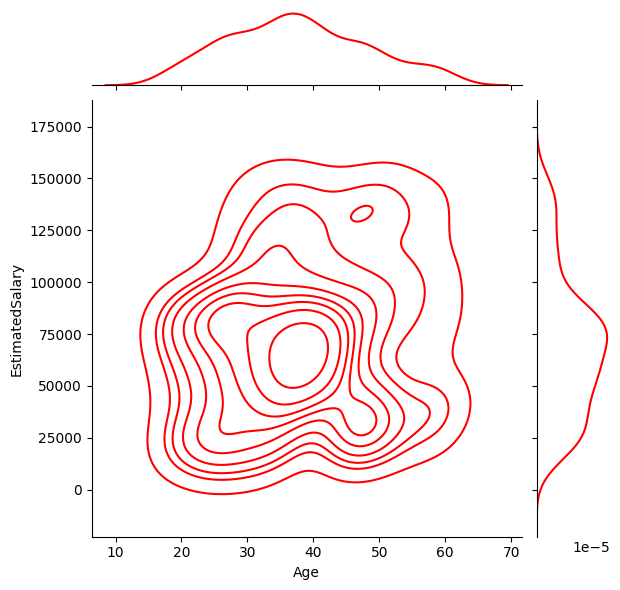

In [51]:
sns.jointplot(x = "Age", y = "EstimatedSalary", data = social_network_ads, kind="kde", color = "red")

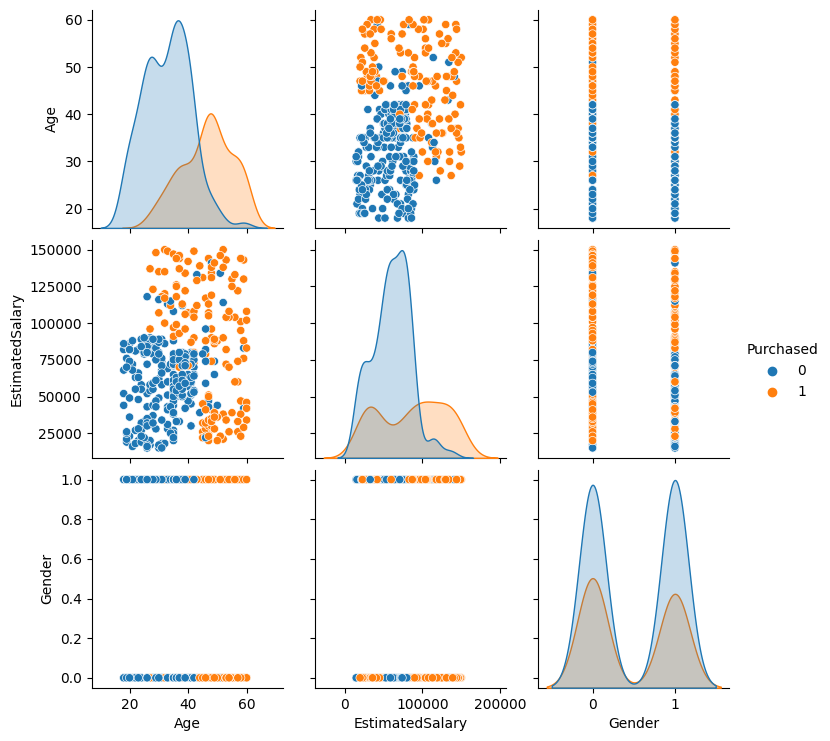

In [52]:
sns.pairplot(social_network_ads, hue = "Purchased")

In [53]:
# What we learn is that the best indication is the age, and that  less thant 40yo with less
# than 80000 of estimated income don't purchase.  Gender is useless.

#I will try a new way to test and train my model using sklearn.

from sklearn.model_selection import train_test_split

x = social_network_ads.drop(["Gender", "EstimatedSalary", "Purchased"], axis=1) 
# So we only have our predictor (Age)
y = social_network_ads["Purchased"]
# And here we have our target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)




In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)



LogisticRegression()

In [78]:
predictions = log_reg.predict(x_test)


In [71]:
from sklearn.metrics import classification_report # I try new things from an article
#classification_report should allows us to get the results as if we got the mean error


print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.92      0.82      0.87        28

    accuracy                           0.91        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.91      0.91      0.91        80



In [57]:
#I understand why do we need to do that.
# We can't use the mean error here because we only uses True and False.

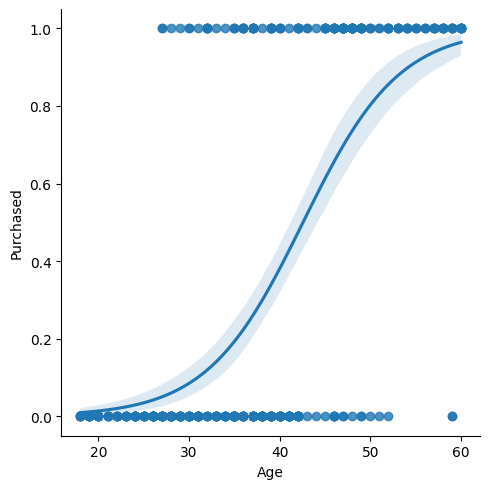

In [60]:

reality = sns.lmplot(x = "Age", y = "Purchased", data = social_network_ads, logistic=True)